### Diabetes Prediction using the data set of NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('health care diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
summary_stats = data.describe().T.round(2)
summary_stats

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

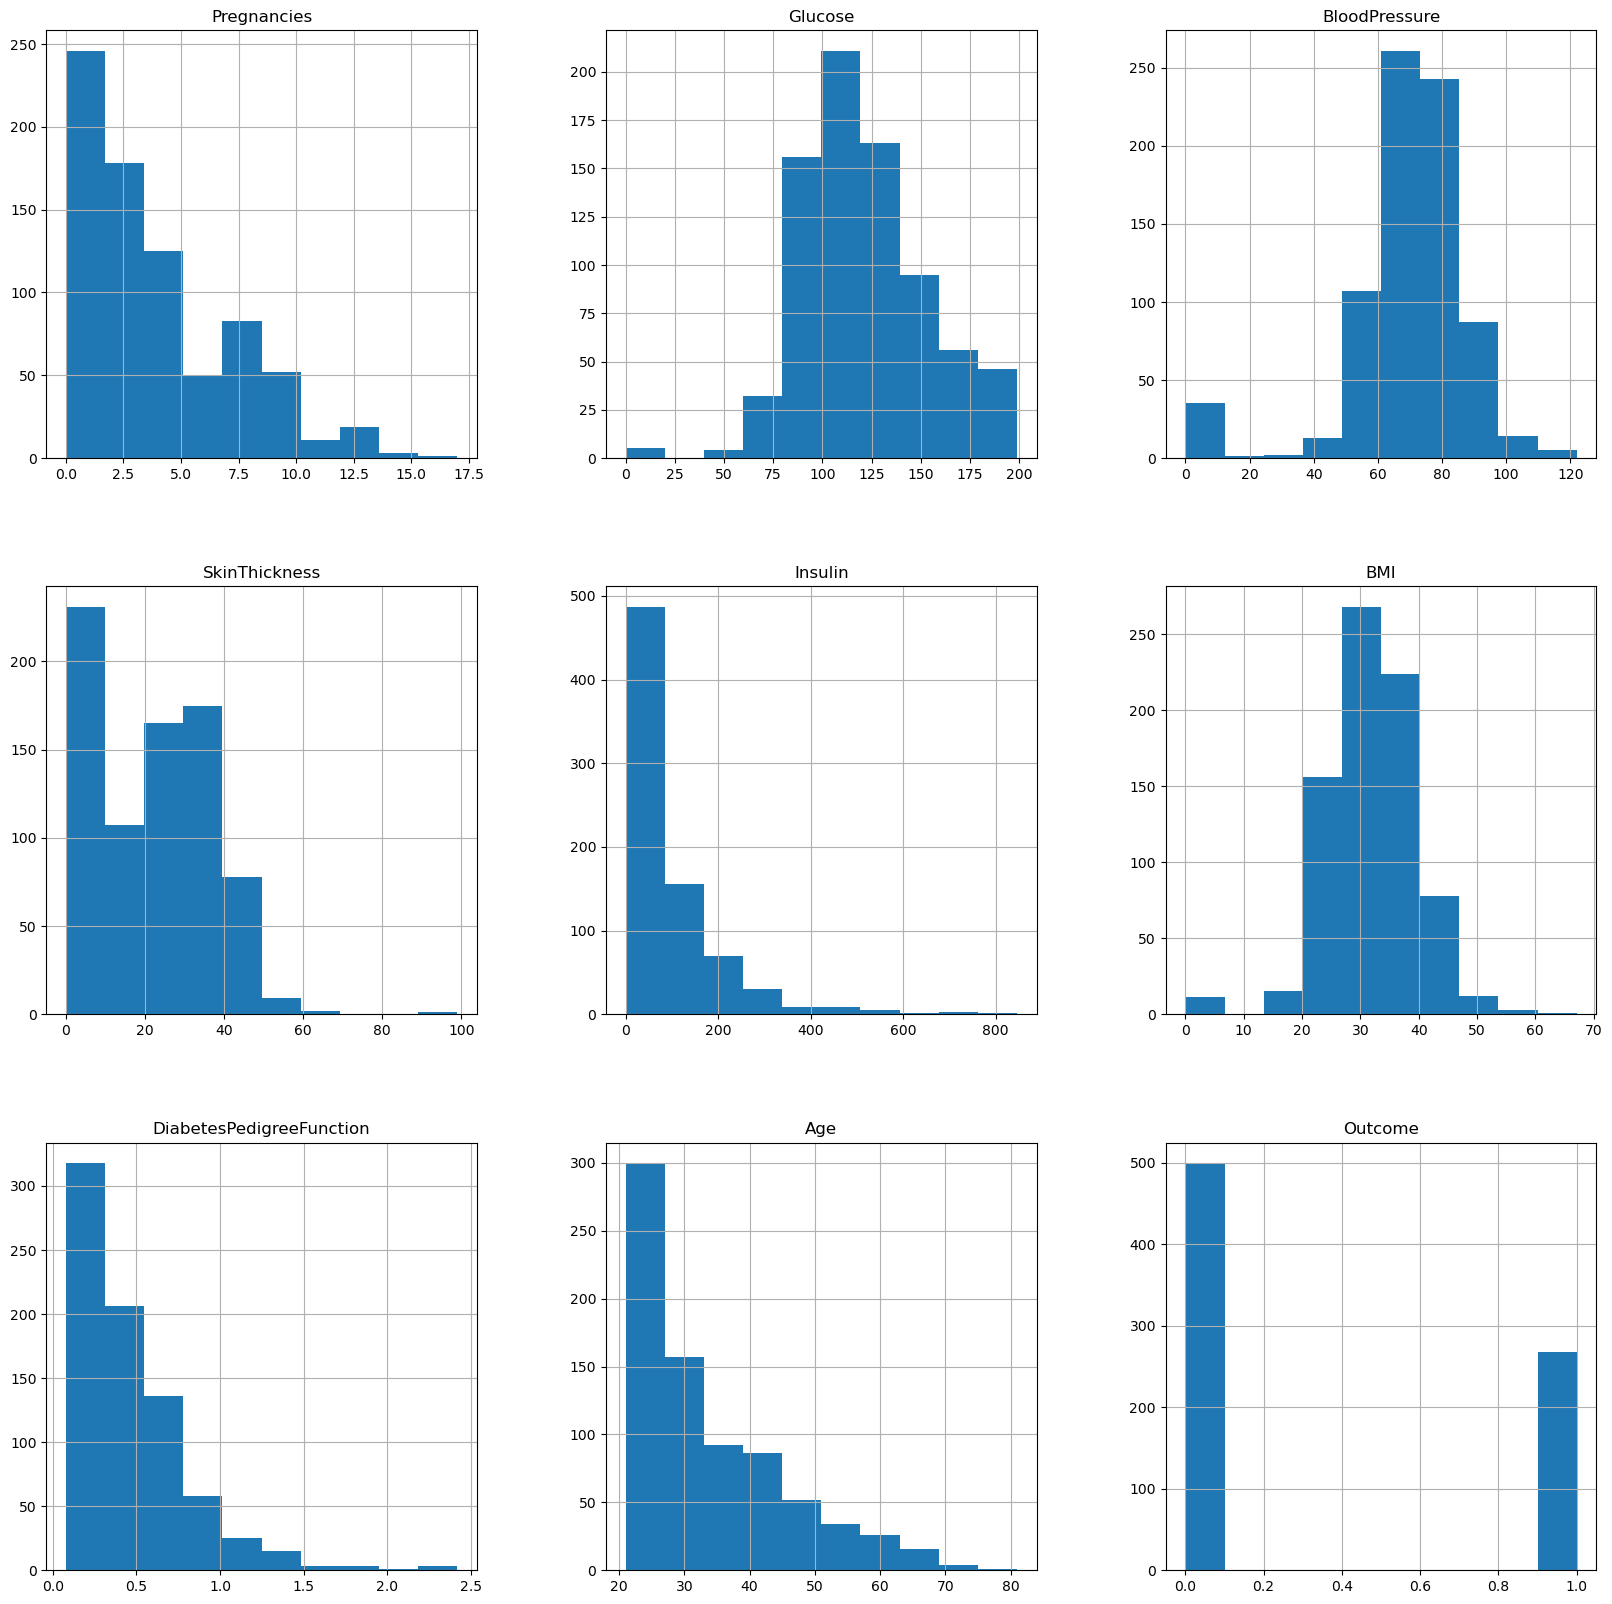

In [6]:
# Histogram of data
data.hist(figsize=(20,20))
plt.show()

Noticed Multiple columns with zero values.

Observation: With reference to he histogram there are multiple features (columns) where data is missing and we need to replace those zero velue with mean value.

Note: It is possible that the patient is not pregnant so Pregnancies column can be zero. Hence excluding pregnancies column. However Glucose, BloodPressure, SkinThickness, Insulin & BMI can be zero.

Process to replace zero values
1. Calculate the mean, excluding zero values
2. Replace zero values with the mean

In [7]:
# Identify columns with zero values
columns_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [8]:
# Replace zero values with mean in these columns
for column in columns_with_zeros:
    mean_value = data[data[column] != 0][column].mean()  
    data[column] = data[column].replace(0, mean_value)

In [9]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,121.69,30.44,44.00,99.75,117.00,140.25,199.00
BloodPressure,768.0,72.41,12.10,24.00,64.00,72.20,80.00,122.00
SkinThickness,768.0,29.15,8.79,7.00,25.00,29.15,32.00,99.00
Insulin,768.0,155.55,85.02,14.00,121.50,155.55,155.55,846.00
BMI,768.0,32.46,6.88,18.20,27.50,32.40,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


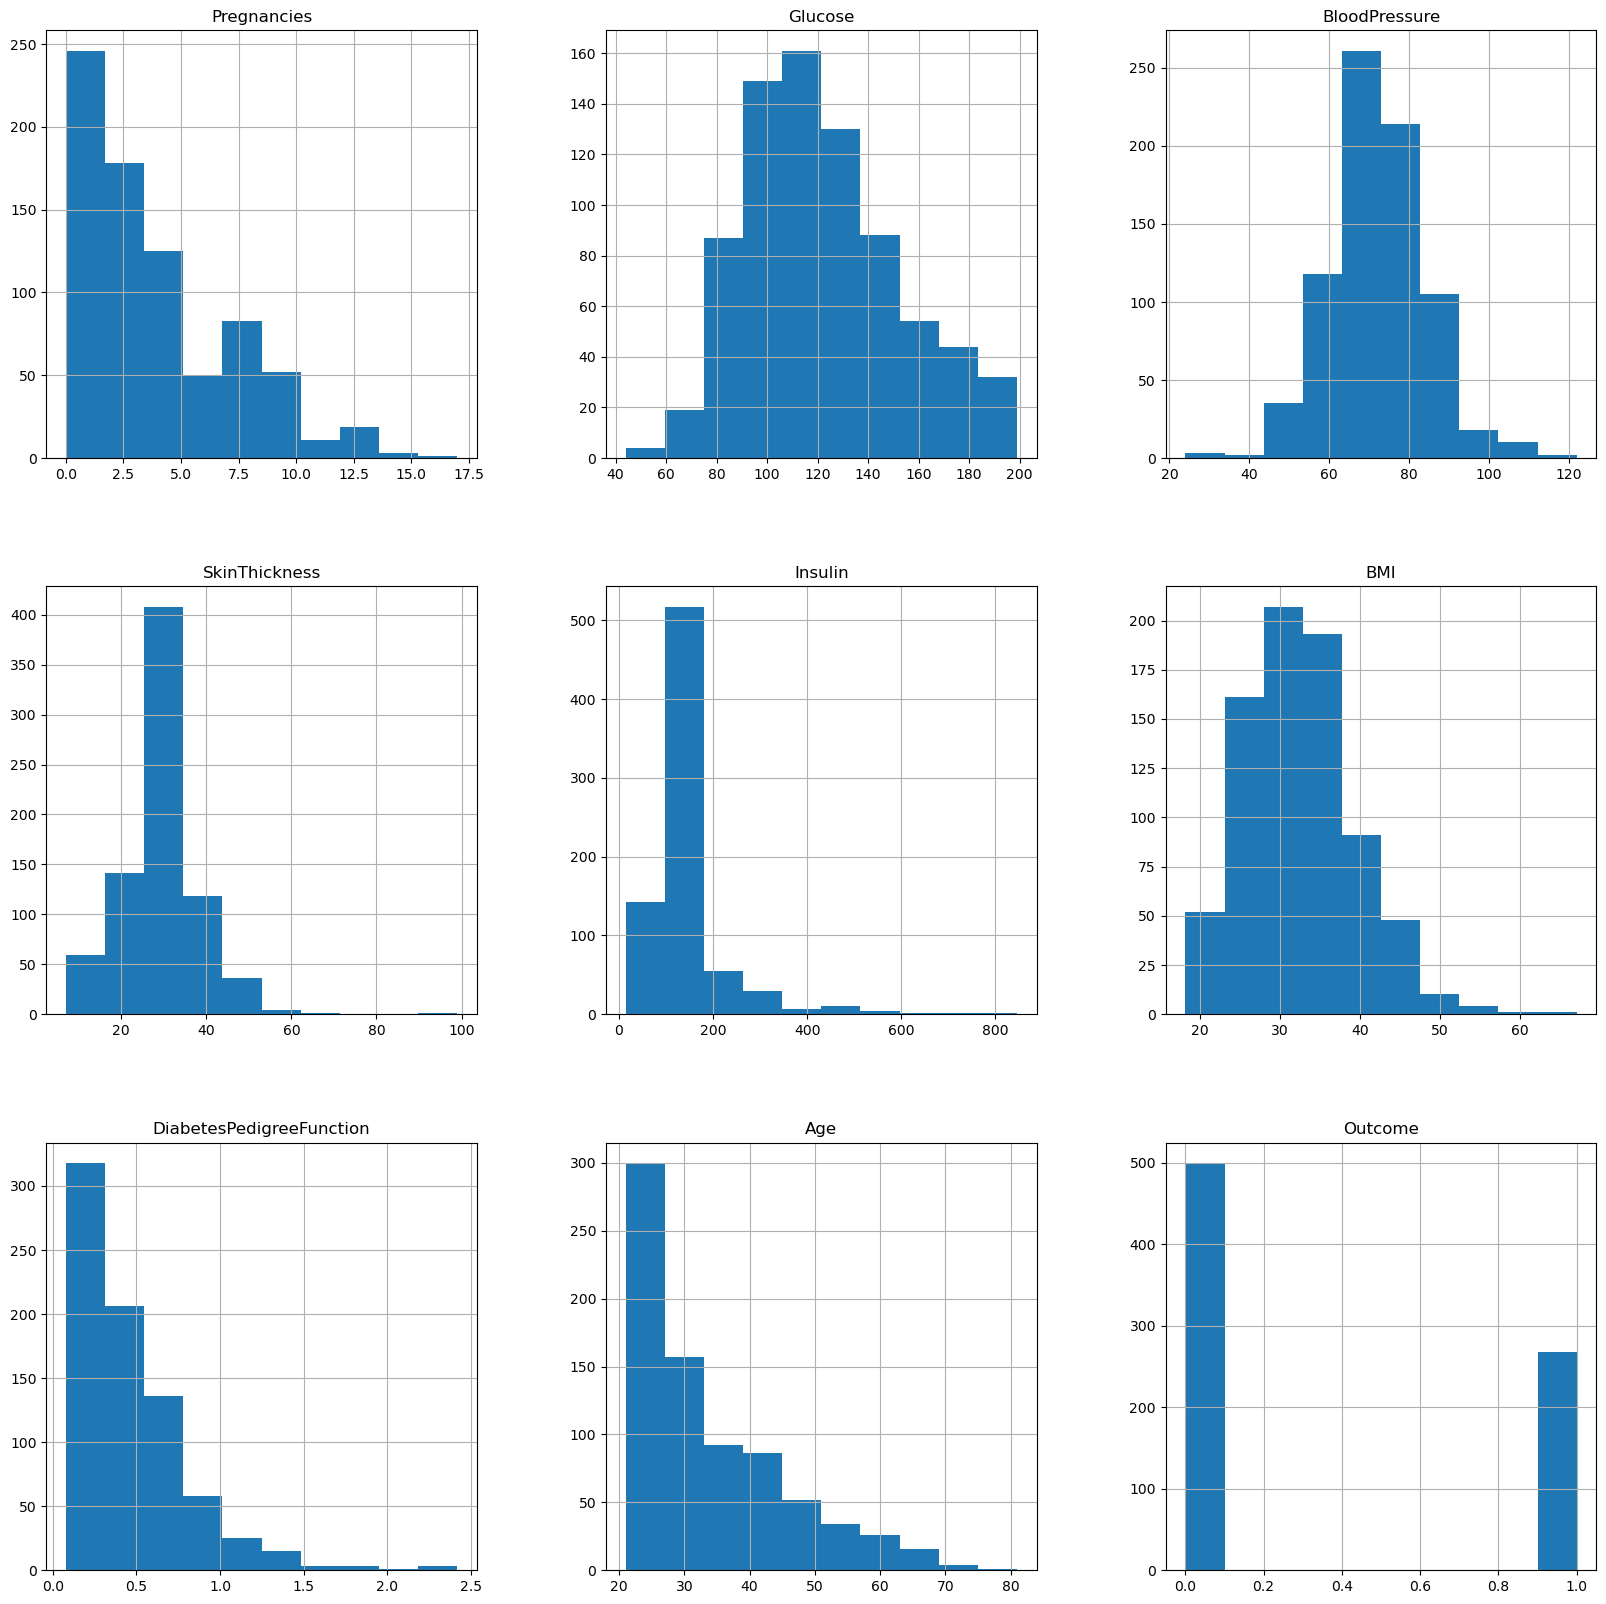

In [12]:
# Data check after replaceing zero values
data.hist(figsize = (20,20))
plt.show()

In [13]:
# Get the data types and count the variables
data_types = data.dtypes
data_type_counts = data.dtypes.value_counts()

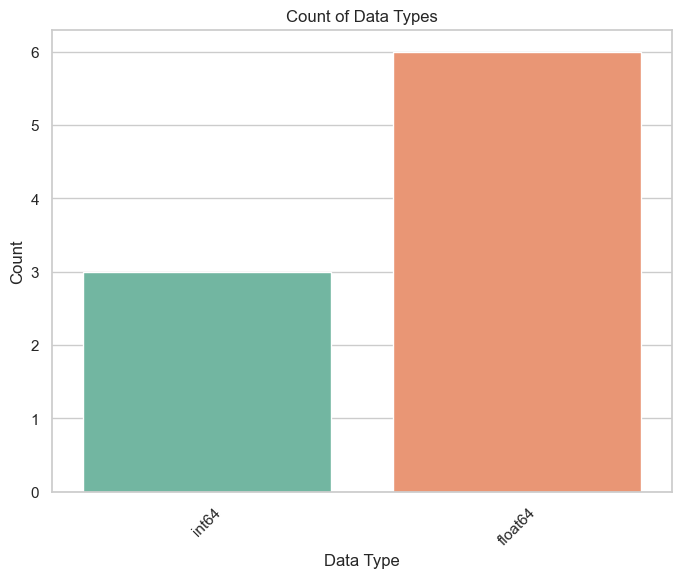

float64    6
int64      3
dtype: int64


In [14]:
# Create a count plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x=data_types, palette="Set2")
plt.title("Count of Data Types")
plt.xlabel("Data Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Print the count of variables for each data type
print(data_type_counts)

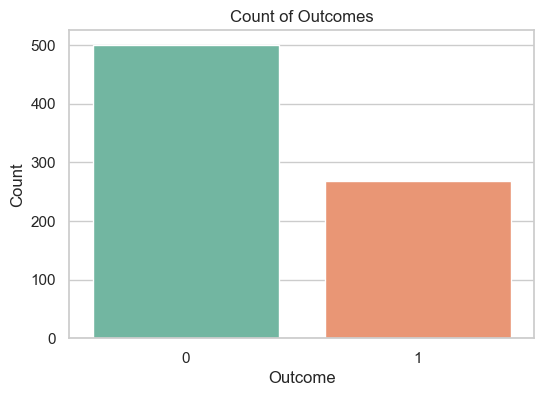

In [15]:
# Create a count plot for the "Outcome" column
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x="Outcome", data=data, palette="Set2")
plt.title("Count of Outcomes")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

### As seen from above figure, there is relatively a high amount of data imbalance. 
### The Number of outcome of 0 is significantly higher than the number of outcome in 1
### To overcome this imbalance we are using the resample from Sklearn library

In [16]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [17]:
from sklearn.utils import resample
majority_class = data[data['Outcome'] == 0]
minority_class = data[data['Outcome'] == 1]
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

In [18]:
augmented_data = pd.concat([majority_class, minority_upsampled])
data=augmented_data

In [19]:
data.shape

(1000, 9)

### Scatter charts between the pair of variables to understand the relationships

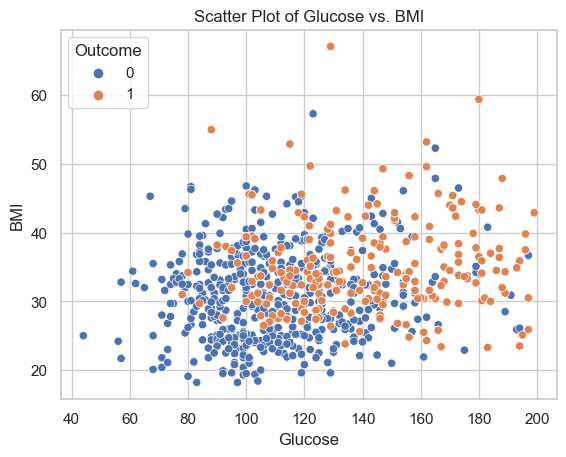

In [20]:
# Example scatter plot for Glucose vs. BMI
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=data)
plt.title('Scatter Plot of Glucose vs. BMI')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()

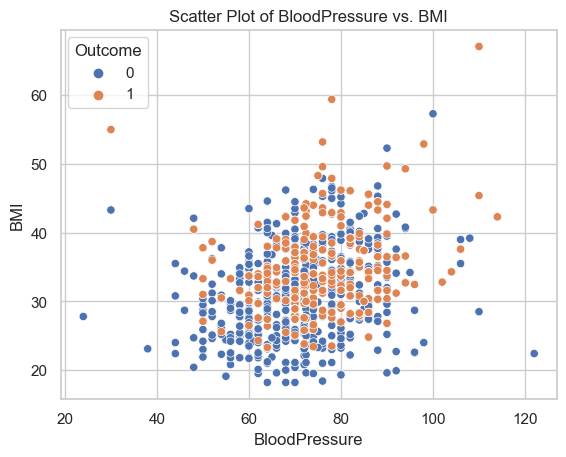

In [21]:
# Example scatter plot for BloodPressure vs. BMI
sns.scatterplot(x='BloodPressure', y='BMI', hue='Outcome', data=data)
plt.title('Scatter Plot of BloodPressure vs. BMI')
plt.xlabel('BloodPressure')
plt.ylabel('BMI')
plt.show()

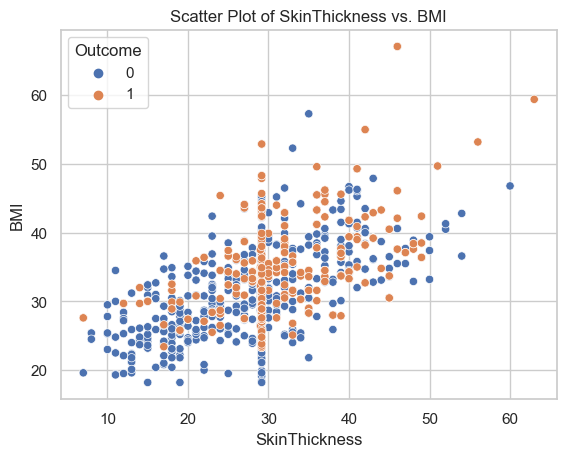

In [22]:
# Example scatter plot for SkinThickness vs. BMI
sns.scatterplot(x='SkinThickness', y='BMI', hue='Outcome', data=data)
plt.title('Scatter Plot of SkinThickness vs. BMI')
plt.xlabel('SkinThickness')
plt.ylabel('BMI')
plt.show()

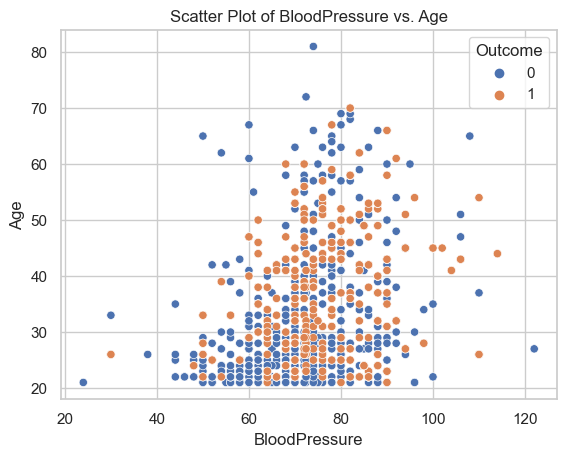

In [23]:
# Example scatter plot for BloodPressure vs. Age
sns.scatterplot(x='BloodPressure', y='Age', hue='Outcome', data=data)
plt.title('Scatter Plot of BloodPressure vs. Age')
plt.xlabel('BloodPressure')
plt.ylabel('Age')
plt.show()

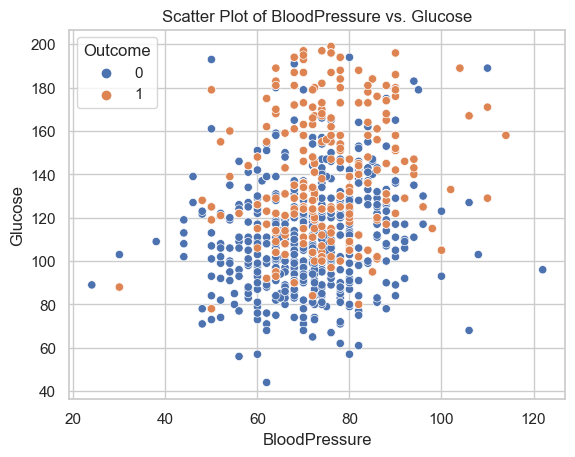

In [24]:
# Example scatter plot for BloodPressure vs. Age
sns.scatterplot(x='BloodPressure', y='Glucose', hue='Outcome', data=data)
plt.title('Scatter Plot of BloodPressure vs. Glucose')
plt.xlabel('BloodPressure')
plt.ylabel('Glucose')
plt.show()

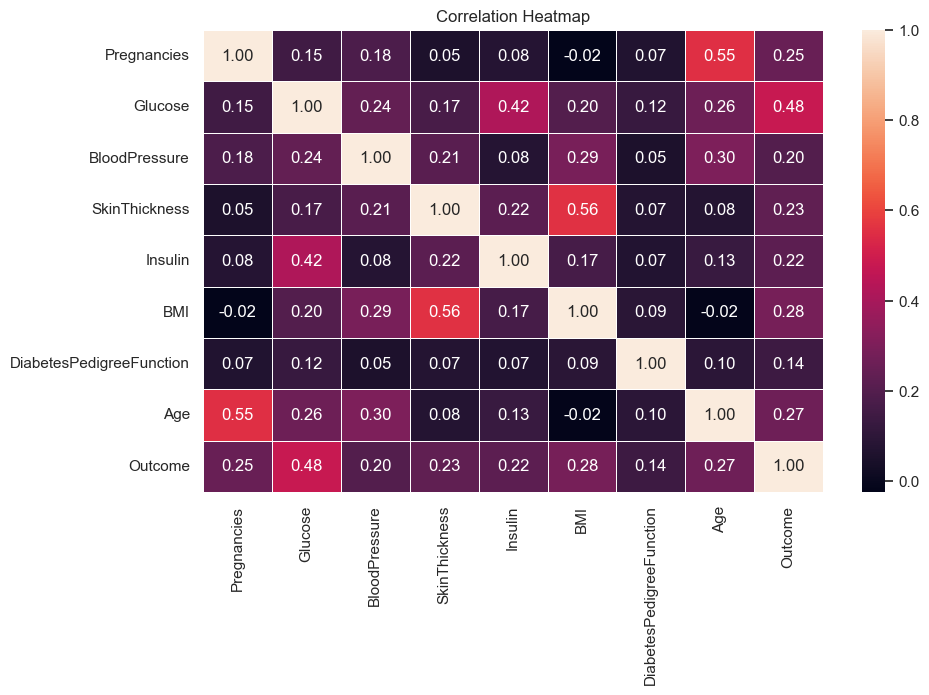

In [25]:
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

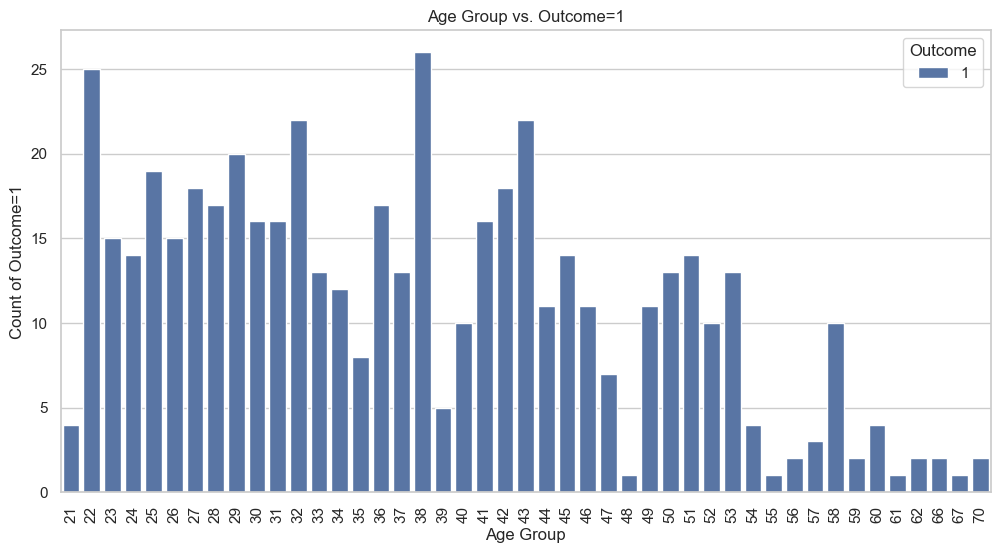

In [26]:
# Check age group with highest number of diabetic patient
plt.figure(figsize=(12, 6))
sns.countplot(x='Age', hue='Outcome', data=data[data['Outcome'] == 1])
plt.title('Age Group vs. Outcome=1')
plt.xlabel('Age Group')
plt.ylabel('Count of Outcome=1')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

### Observation: Glucose has the highest correlation with Diabetese.

<Figure size 1000x600 with 0 Axes>

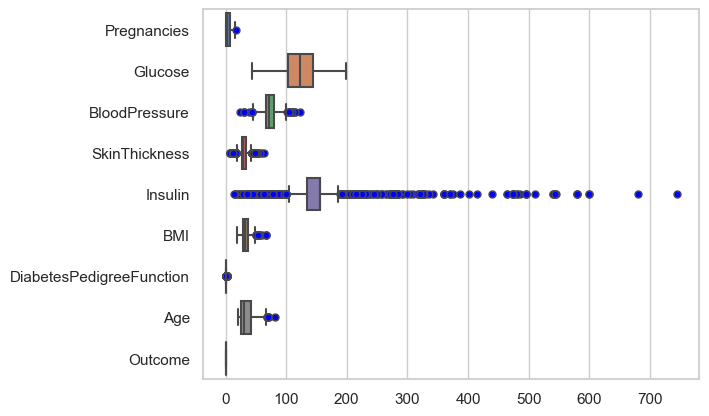

<Figure size 1000x600 with 0 Axes>

In [27]:
sns.boxplot(data, orient='h', flierprops={'markerfacecolor': 'blue', 'marker': 'o'})
plt.figure(figsize=(10,6))

### Observation: Outliers is noticed in glucose column

In [28]:
X = data.drop(columns=['Outcome'])
y = data['Outcome'].values

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score

In [32]:
# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

In [34]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
pre_score=precision_score(y_test, y_pred)

In [35]:
# Print the results
print(f"Test Accuracy: {accuracy:.2f}")
print(f"Train Accuracy: {accuracy_score(y_train, rf_classifier.predict(X_train)):.2f}")
print(f"Precision Score: {pre_score:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Test Accuracy: 0.90
Train Accuracy: 1.00
Precision Score: 0.89
Confusion Matrix:
 [[84 12]
 [ 8 96]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89        96
           1       0.89      0.92      0.91       104

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



### The train accuracy is 1.00 and the test accuracy is 0.90 after using the RandomForestClassifier algorythm & this clearly indicates a case of over fitting of data. However the accuracy shown is 0.9 which is really good.

### Below is the comparison with other Algorythms like KNN, SVC & DecisionTreeClassifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
n_neighbors=9
random_state=42
# Comparison with other models
# You can replace these models with other classifiers if needed
models = {
    'K-Nearest Neighbors (KNN)' : KNeighborsClassifier(n_neighbors=n_neighbors),
    'Support Vector Machine': SVC(random_state=random_state),
    'Decision Tree': DecisionTreeClassifier(random_state=random_state)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    test_accuracy_compare = accuracy_score(y_test, model.predict(X_test))
    train_accuracy_compare = accuracy_score(y_train, model.predict(X_train))
    print(f"\n{model_name} Results:")
    print(f"Test Accuracy: {test_accuracy_compare:.2f}")
    print(f"Train Accuracy: {train_accuracy_compare:.2f}")
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, model.predict(X_test)))
    print("\nClassification Report:\n", classification_report(y_test, model.predict(X_test)))


K-Nearest Neighbors (KNN) Results:
Test Accuracy: 0.75
Train Accuracy: 0.79

Confusion Matrix:
 [[66 30]
 [20 84]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.69      0.73        96
           1       0.74      0.81      0.77       104

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200


Support Vector Machine Results:
Test Accuracy: 0.79
Train Accuracy: 0.84

Confusion Matrix:
 [[70 26]
 [17 87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.73      0.77        96
           1       0.77      0.84      0.80       104

    accuracy                           0.79       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.79      0.78       200


Decision Tree Results:
Test Accuracy: 0.82
Train Accuracy: 1.00

C

### These results show that Random Forest Classifier had a better accuracy as compared to other models like Decision Tree models, KNN & SVM in terms of accuracy. 
### Decision Tree appears to have the highest accuracy among the models, and it might be a good choice for your diabetes prediction task.

## Data Reporting:

Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

Pie chart to describe the diabetic or non-diabetic population

Scatter charts between relevant variables to analyze the relationships

Histogram or frequency charts to analyze the distribution of the data

Heatmap of correlation analysis among the relevant variables

Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

## Link to tableau data analysis.

https://prod-apnortheast-a.online.tableau.com/t/sujin1surendran/views/XD_Data/Dashboard4

## Conclusion:

### 1. The dataset contains 768 records out of which 267 records belong to age group 20-25. Which is the highest among all other age class.
### 2. There is an imbalance in data as out of 768 records 500 records belong to non-dabetic patients.
### 3. Age group 20-30 have the least number of diabetic patient. Where as the number of diabetic patients gradually increase after the age of 30.
### 4. Age class 20-25 have the highest number of insulin recorder.
### 5. Female patient in age group 40-45 with BP issue have high changes of being diabetic during pregnancy.